This notebook is for visualizing the new TF-Modisco results for mouse-only brain models trained with non-enhancer orthologs of enhancers as negatives.

In [1]:
# Import necessary dependencies

from __future__ import division
from __future__ import print_function
%matplotlib inline
import numpy as np
import modisco
import sys
print (sys.version)
import os

3.6.15 | packaged by conda-forge | (default, Dec  3 2021, 18:49:41) 
[GCC 9.4.0]


Save and print the results.

Metaclusters heatmap


metacluster_0
activity pattern: [-1]
metacluster_0 pattern_0
total seqlets: 818
Task 0 hypothetical scores:


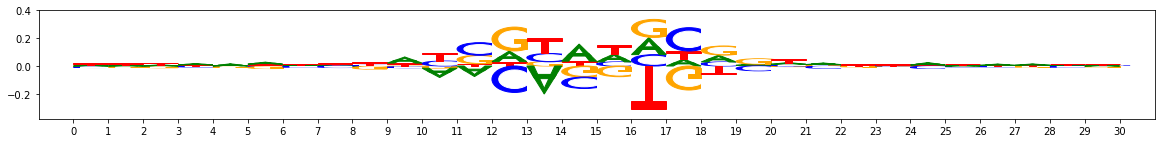

Task 0 actual importance scores:


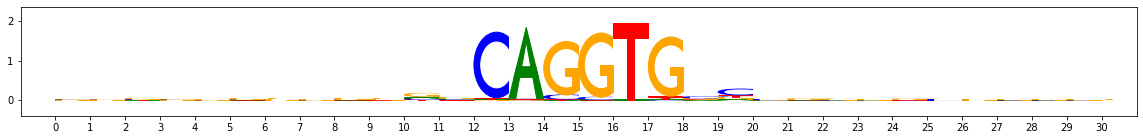

metacluster_0 pattern_1
total seqlets: 792
Task 0 hypothetical scores:


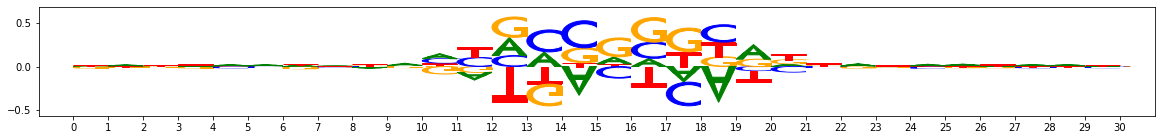

Task 0 actual importance scores:


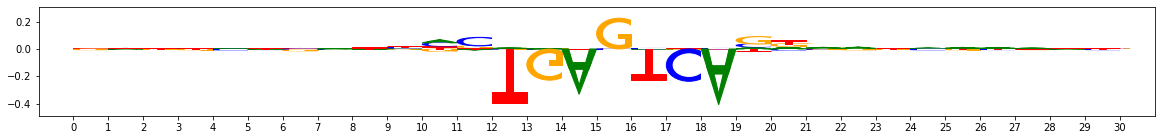

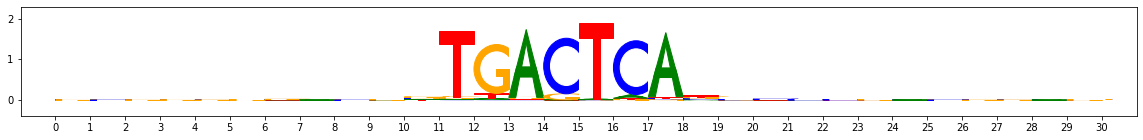

metacluster_0 pattern_2
total seqlets: 558
Task 0 hypothetical scores:


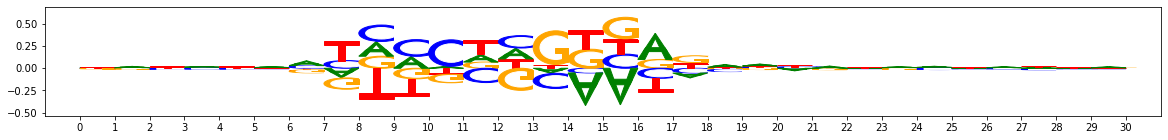

Task 0 actual importance scores:


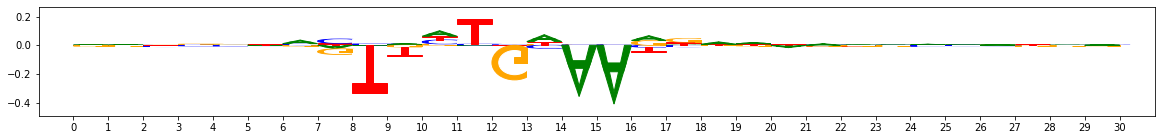

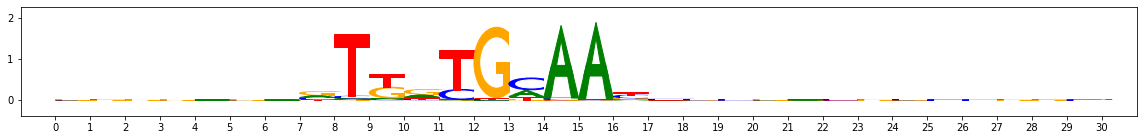

metacluster_0 pattern_3
total seqlets: 431
Task 0 hypothetical scores:


Task 0 actual importance scores:


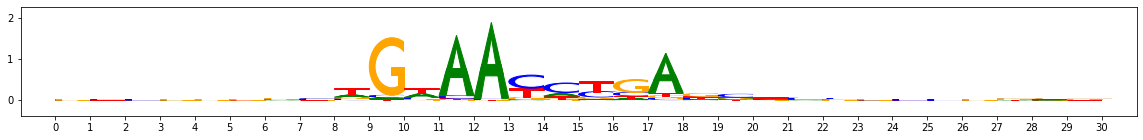

metacluster_0 pattern_4
total seqlets: 312
Task 0 hypothetical scores:


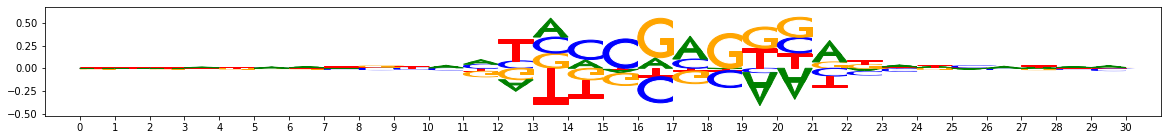

Task 0 actual importance scores:


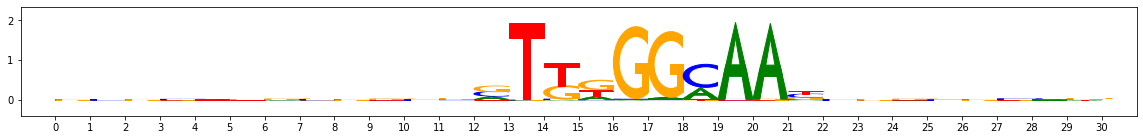

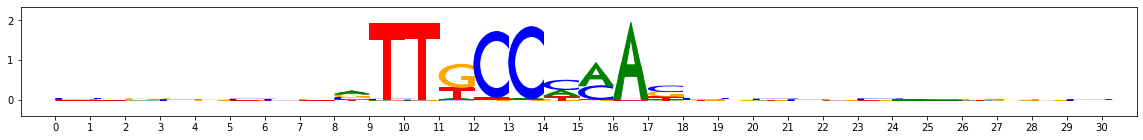

metacluster_0 pattern_5
total seqlets: 260
Task 0 hypothetical scores:


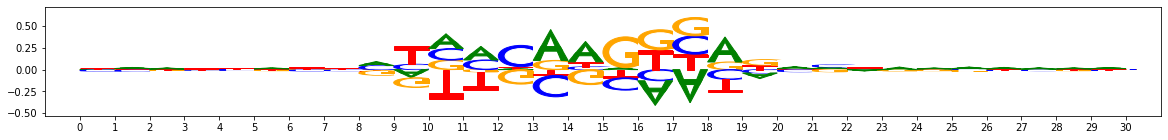

Task 0 actual importance scores:


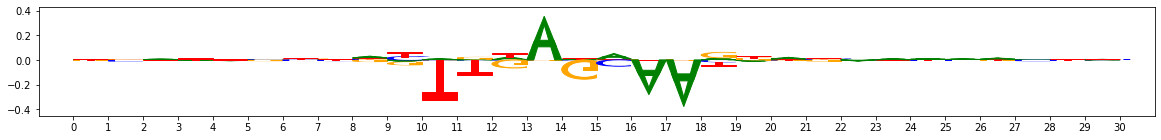

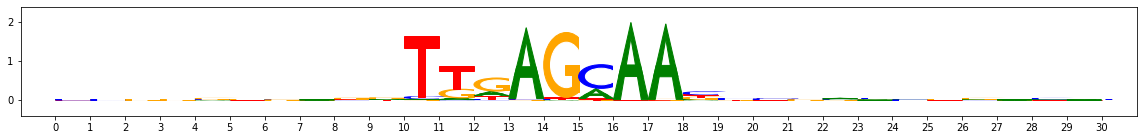

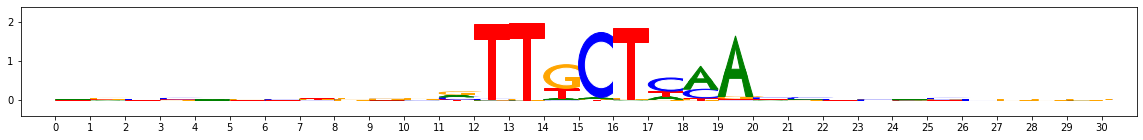

metacluster_0 pattern_6
total seqlets: 232
Task 0 hypothetical scores:


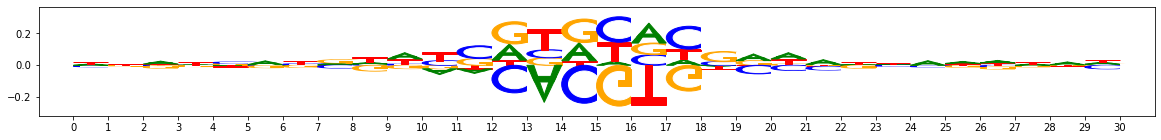

Task 0 actual importance scores:


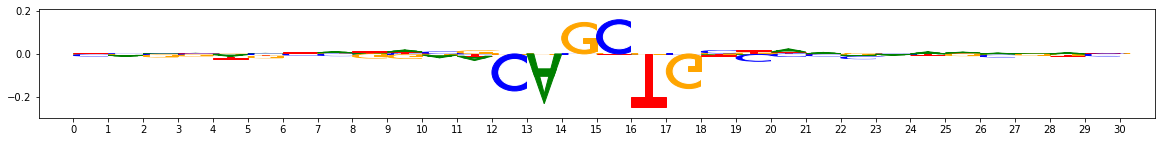

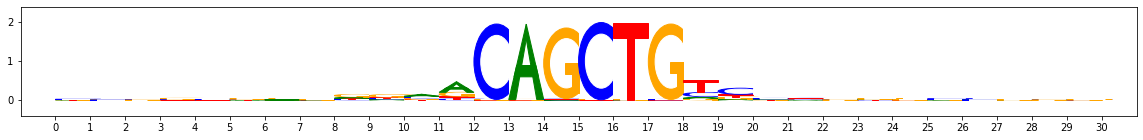

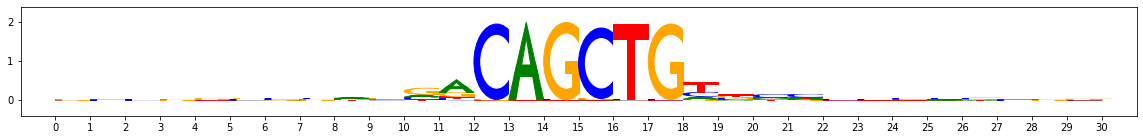

metacluster_0 pattern_7
total seqlets: 149
Task 0 hypothetical scores:


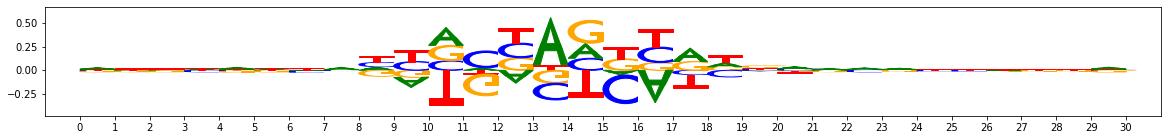

Task 0 actual importance scores:


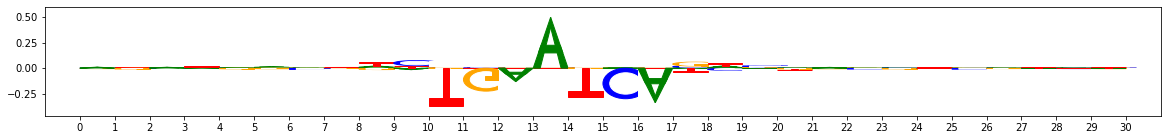

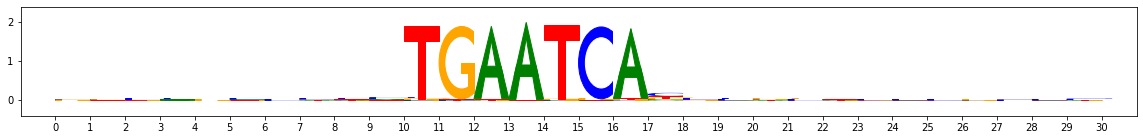

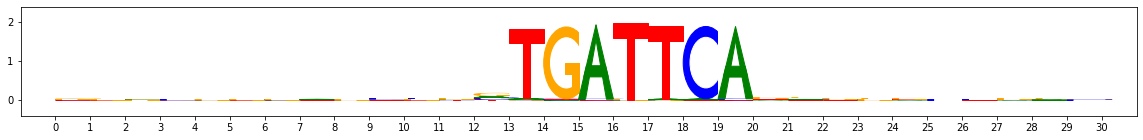

metacluster_0 pattern_8
total seqlets: 120
Task 0 hypothetical scores:


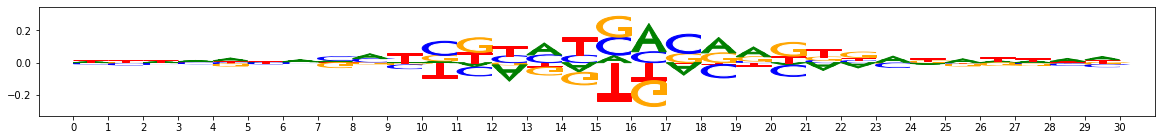

Task 0 actual importance scores:


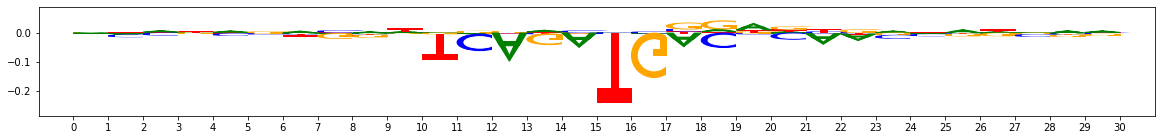

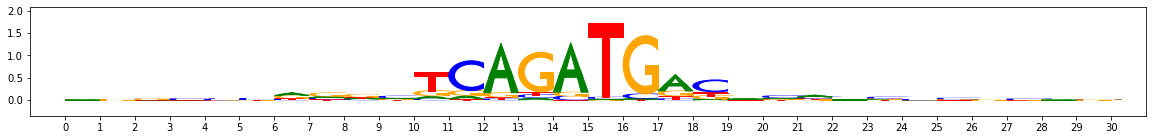

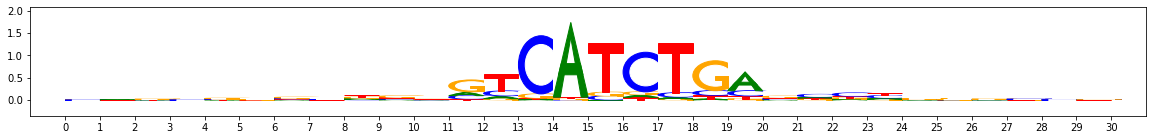

metacluster_0 pattern_9
total seqlets: 106
Task 0 hypothetical scores:


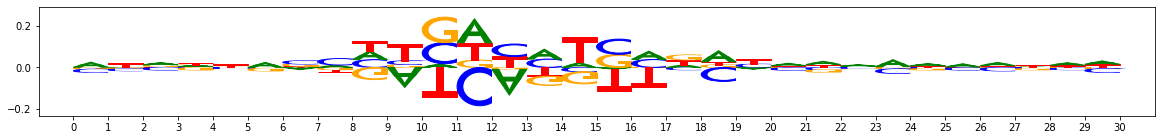

Task 0 actual importance scores:


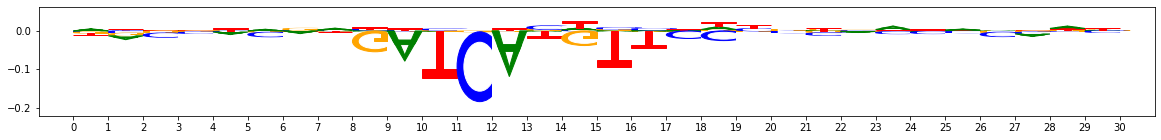

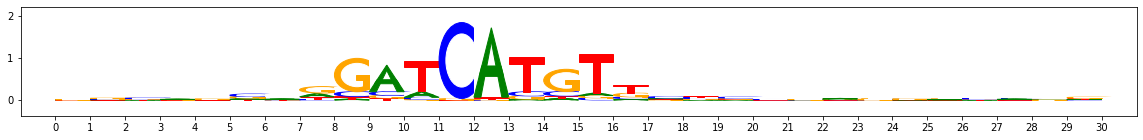

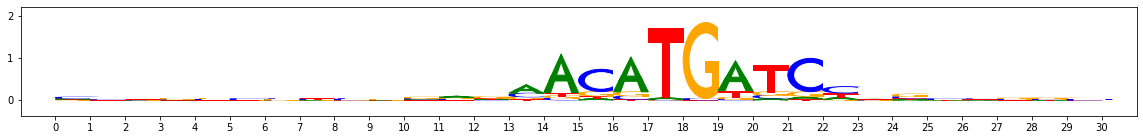

metacluster_0 pattern_10
total seqlets: 81
Task 0 hypothetical scores:


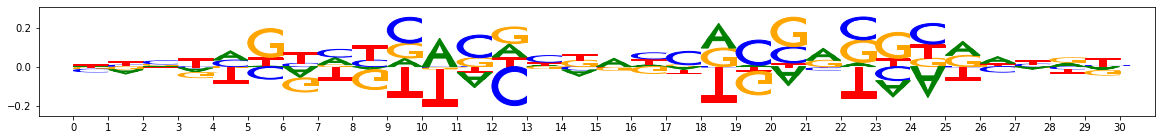

Task 0 actual importance scores:


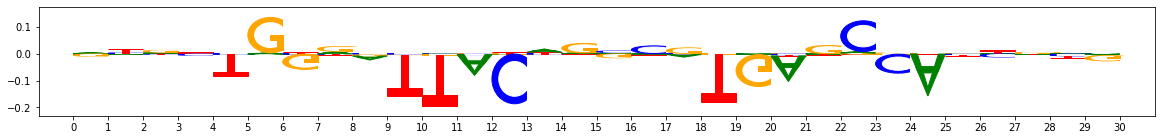

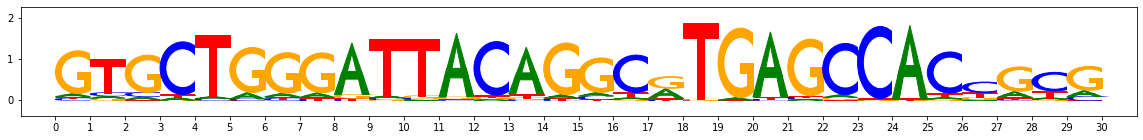

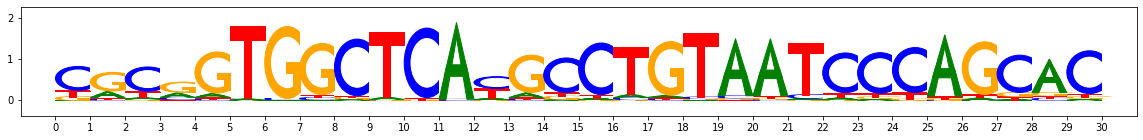

metacluster_0 pattern_11
total seqlets: 78
Task 0 hypothetical scores:


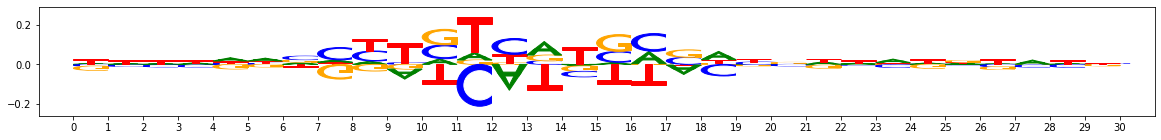

Task 0 actual importance scores:


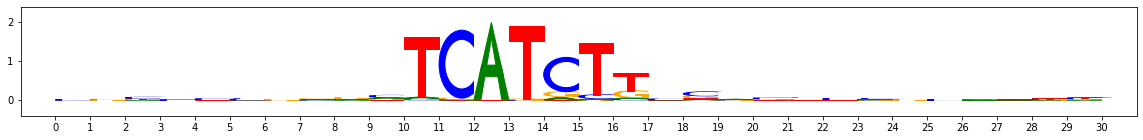

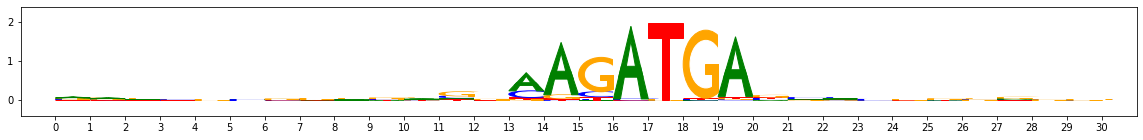

metacluster_0 pattern_12
total seqlets: 51
Task 0 hypothetical scores:


Task 0 actual importance scores:


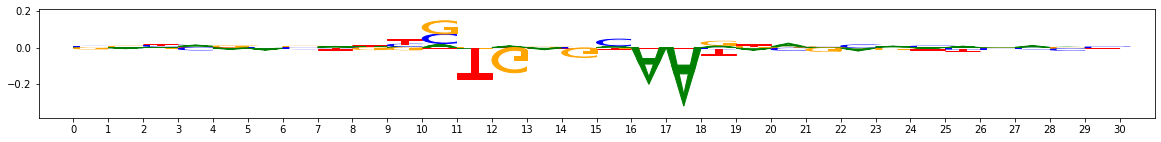

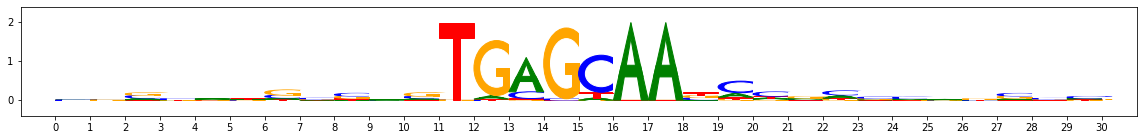

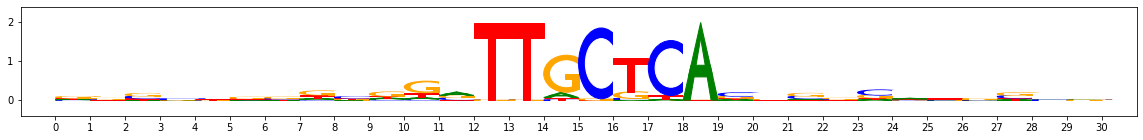

metacluster_0 pattern_13
total seqlets: 41
Task 0 hypothetical scores:


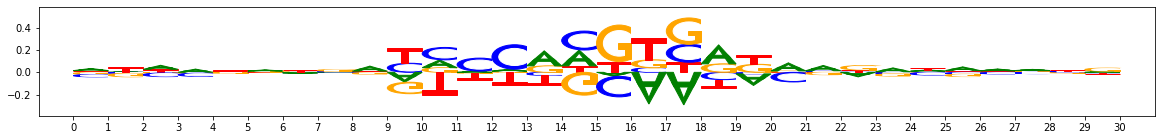

Task 0 actual importance scores:


metacluster_0 pattern_14
total seqlets: 32
Task 0 hypothetical scores:


Task 0 actual importance scores:


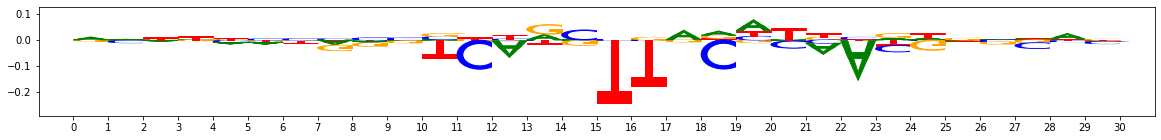

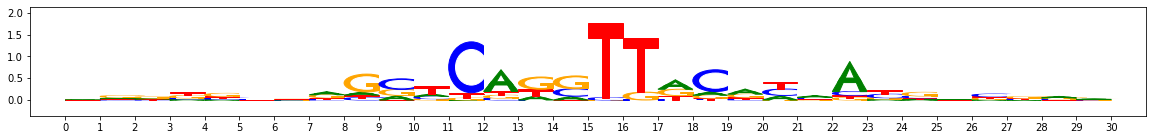

metacluster_0 pattern_15
total seqlets: 28
Task 0 hypothetical scores:


Task 0 actual importance scores:


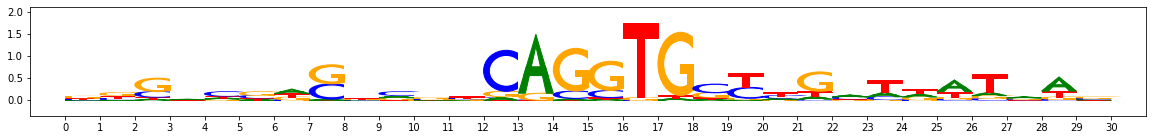

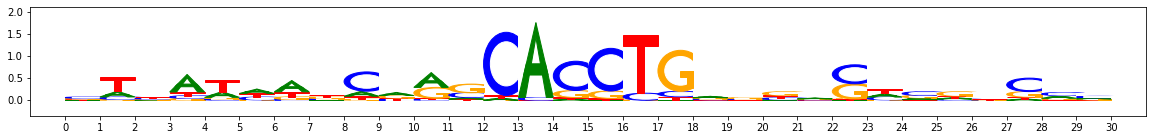

metacluster_0 pattern_16
total seqlets: 28
Task 0 hypothetical scores:


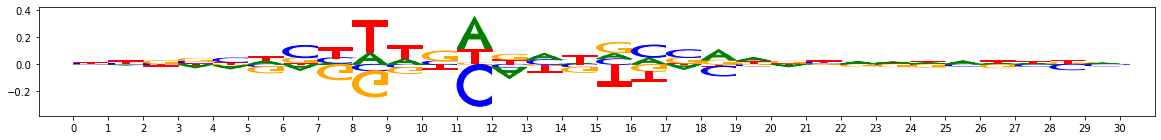

Task 0 actual importance scores:


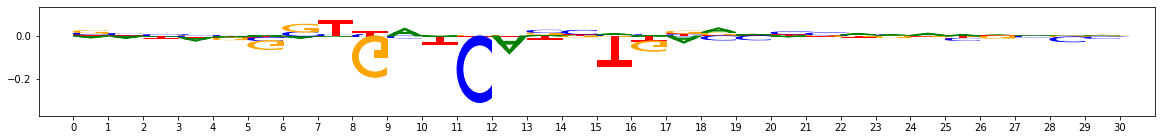

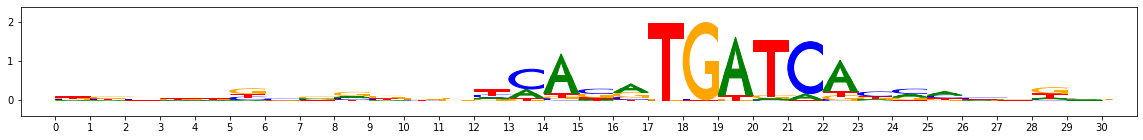

metacluster_0 pattern_17
total seqlets: 25
Task 0 hypothetical scores:


Task 0 actual importance scores:


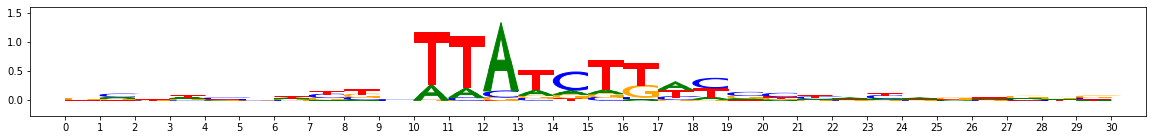

metacluster_1
activity pattern: [1]
metacluster_1 pattern_0
total seqlets: 1032
Task 0 hypothetical scores:


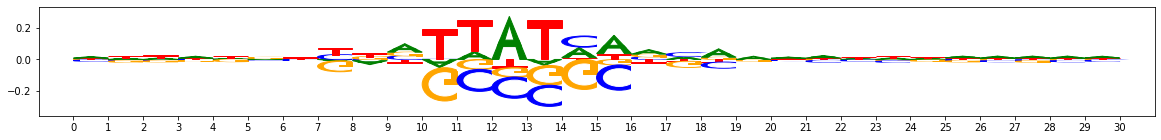

Task 0 actual importance scores:


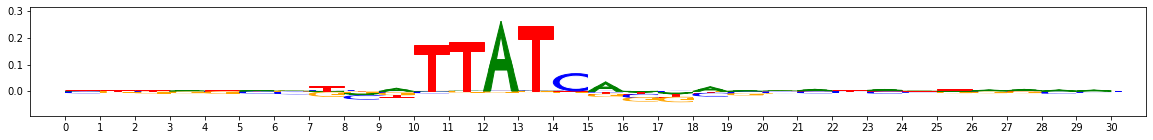

metacluster_1 pattern_1
total seqlets: 122
Task 0 hypothetical scores:


Task 0 actual importance scores:


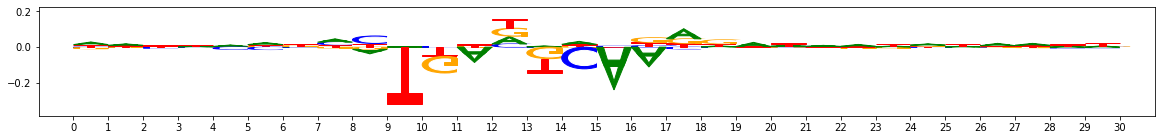

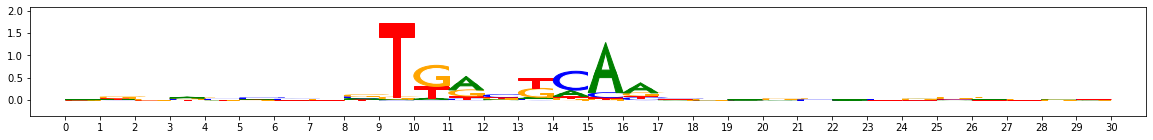

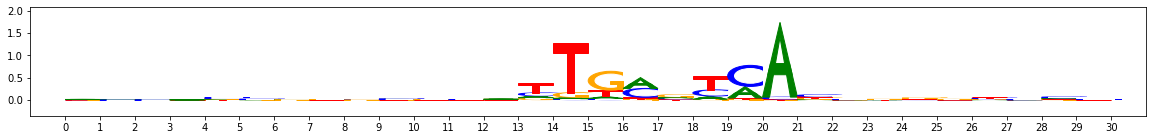

metacluster_1 pattern_2
total seqlets: 63
Task 0 hypothetical scores:


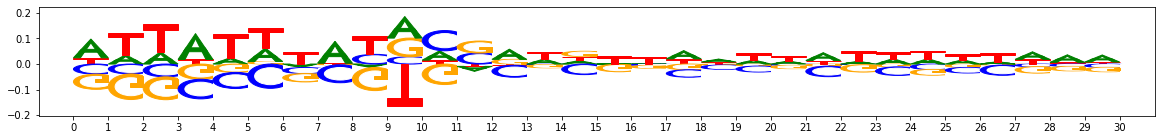

Task 0 actual importance scores:


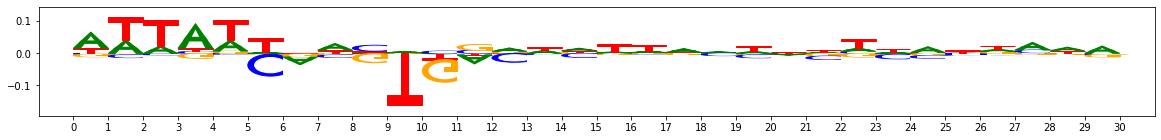

metacluster_1 pattern_3
total seqlets: 53
Task 0 hypothetical scores:


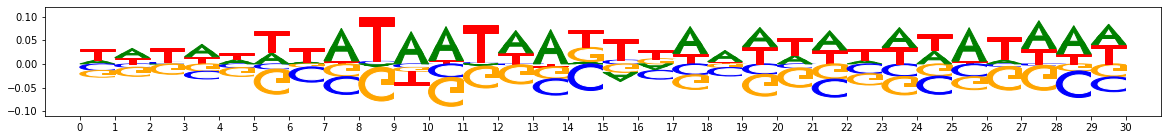

Task 0 actual importance scores:


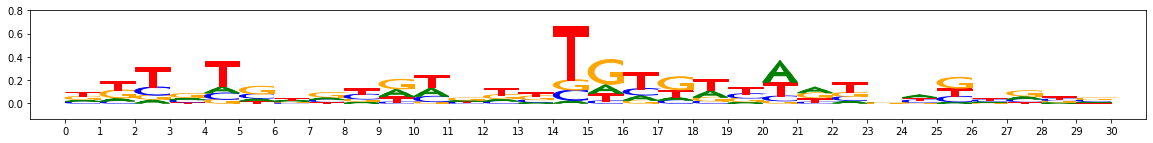

metacluster_1 pattern_4
total seqlets: 45
Task 0 hypothetical scores:


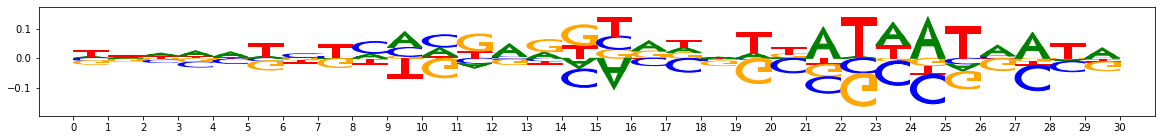

Task 0 actual importance scores:


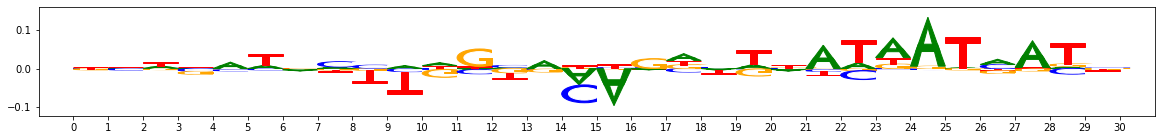

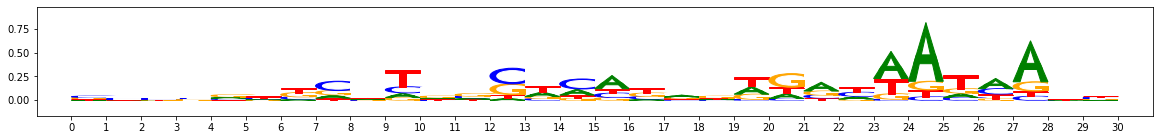

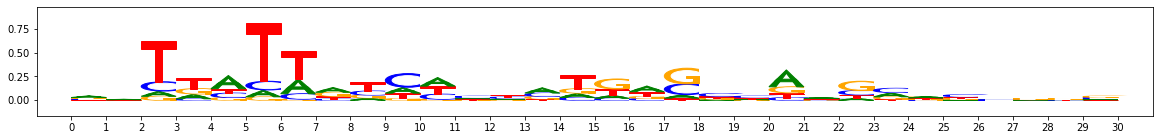

metacluster_1 pattern_5
total seqlets: 45
Task 0 hypothetical scores:


Task 0 actual importance scores:


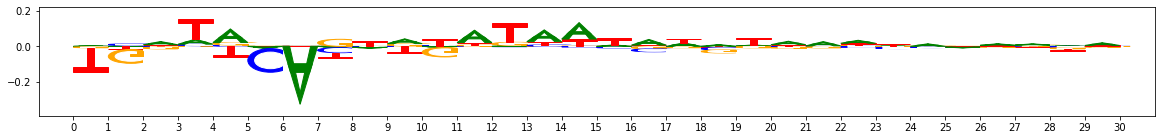

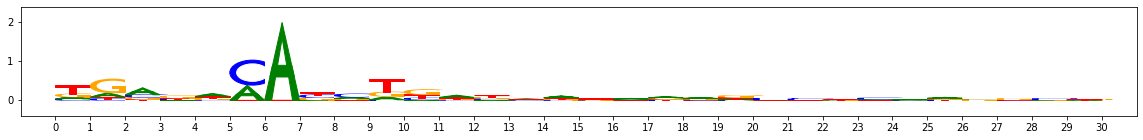

metacluster_1 pattern_6
total seqlets: 42
Task 0 hypothetical scores:


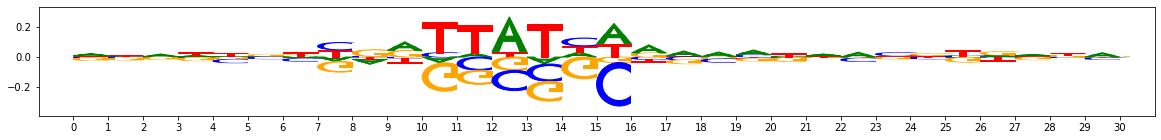

Task 0 actual importance scores:


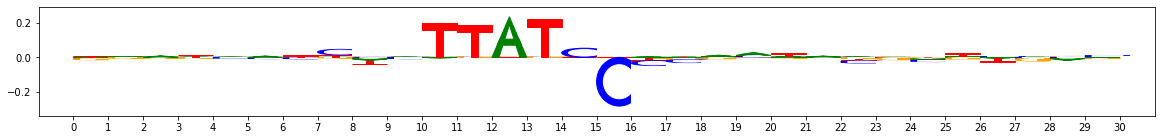

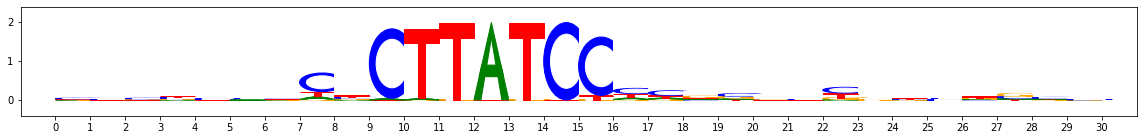

metacluster_1 pattern_7
total seqlets: 26
Task 0 hypothetical scores:


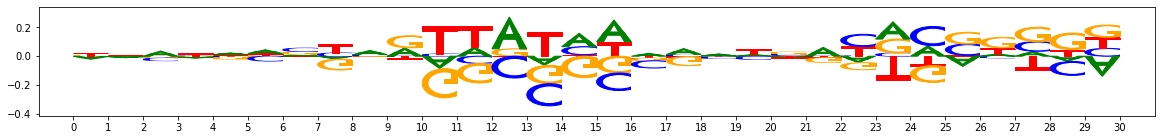

Task 0 actual importance scores:


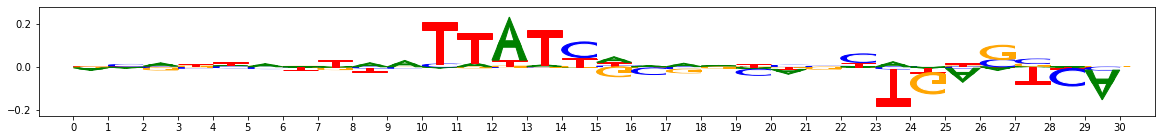

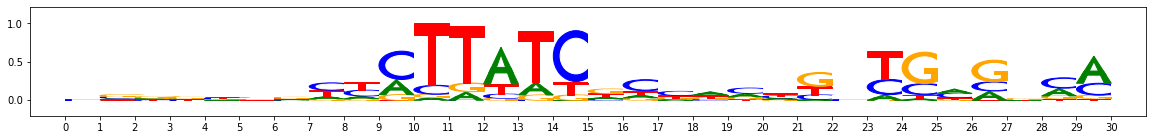

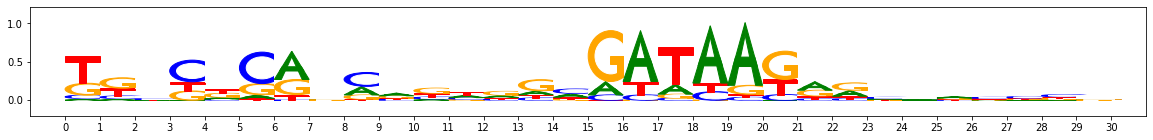

In [3]:
import h5py
import modisco.util

from collections import Counter
from modisco.visualization import viz_sequence
from matplotlib import pyplot as plt

import modisco.affinitymat.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.cluster.core
import modisco.aggregator

hdf5_results = h5py.File("/hpc/group/gersbachlab/imk11/ENCODEHumanDNase/LeftVentricle/atac/peak/idr_reproducibility/idr.conservative_peak_orRightVentricle_overlapHeartOverSkmuscleChipfilter_vsSkeletalMuscleOverHeartChipfilter_data_train.KerasModels/heartMuscleChipfilter_250bp_conv3SmallBatchLowLR_NewestTFModiscoResults_trainAndValid.h5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.29, 0.21, 0.21, 0.29])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        try:
            viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                            background=background)) 
            viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                            background=background))
        except:
            print("Probabilities do not add up to 1")
        
hdf5_results.close()

Get sequence scores for each motif

In [6]:
hdf5_results = h5py.File("/hpc/group/gersbachlab/imk11/ENCODEHumanDNase/LeftVentricle/atac/peak/idr_reproducibility/idr.conservative_peak_orRightVentricle_overlapHeartOverSkmuscleChipfilter_vsSkeletalMuscleOverHeartChipfilter_data_train.KerasModels/heartMuscleChipfilter_250bp_conv3SmallBatchLowLR_NewestTFModiscoResults_trainAndValid.h5","r")

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        print(np.array(pattern["sequence"]["fwd"]))
        
hdf5_results.close()

Starting
metacluster_0
activity pattern: [-1]
metacluster_0 pattern_0
total seqlets: 818
Task 0 hypothetical scores:
[[0.21271394 0.27261614 0.2799511  0.23471883]
 [0.21026895 0.23105134 0.30195599 0.25672372]
 [0.17237164 0.25794621 0.36430318 0.20537897]
 [0.21149144 0.25305623 0.29217604 0.24327628]
 [0.20904645 0.26528117 0.31662592 0.20904645]
 [0.20415648 0.29339853 0.33374083 0.16870416]
 [0.22738386 0.28484108 0.28850856 0.1992665 ]
 [0.21638142 0.25427873 0.32151589 0.20782396]
 [0.2200489  0.25061125 0.35207824 0.17726161]
 [0.18581907 0.2200489  0.3202934  0.27383863]
 [0.26894866 0.18215159 0.44621027 0.10268949]
 [0.21882641 0.25794621 0.37775061 0.14547677]
 [0.01222494 0.96699267 0.00855746 0.01222494]
 [0.98410758 0.00611247 0.00366748 0.00611247]
 [0.00488998 0.06845966 0.91442543 0.01222494]
 [0.00488998 0.03178484 0.9596577  0.00366748]
 [0.00122249 0.         0.         0.99877751]
 [0.00977995 0.00366748 0.9400978  0.04645477]
 [0.1405868  0.35574572 0.32396088 0.